# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
Data = pd.read_csv("data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv")
%matplotlib notebook
print(Data.dtypes)
Data.head()

ID            object
Date          object
Element       object
Data_Value     int64
dtype: object


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [3]:
Data[['Date']] = pd.to_datetime(Data.Date)

In [4]:
Data['Dayofyear'] = [row['Date'].dayofyear-1 for index, row in Data.iterrows()]

In [5]:
Data = Data[(Data.Date.dt.month != 2) | (Data.Date.dt.day != 29)]

In [6]:
databefore2015 = Data[Data.Date.dt.year < 2015]
databefore2015max = databefore2015.loc[databefore2015.Element == 'TMAX', ['Data_Value', 'Dayofyear']]
databefore2015min = databefore2015.loc[databefore2015.Element == 'TMIN', ['Data_Value', 'Dayofyear']]

In [7]:
databefore2015max = databefore2015max.groupby('Dayofyear').Data_Value.max()
databefore2015min = databefore2015min.groupby('Dayofyear').Data_Value.min()

In [8]:
print(databefore2015max)
print(len(databefore2015min))

Dayofyear
0      156
1      139
2      133
3      106
4      128
5      189
6      217
7      194
8      178
9      100
10     156
11     161
12     167
13     150
14      67
15      94
16     133
17     122
18     106
19     133
20     133
21     117
22     128
23     117
24     100
25      89
26      78
27     122
28     178
29     183
      ... 
336    156
337    183
338    183
339    161
340     67
341     83
342     83
343    111
344    128
345    133
346    111
347    139
348    150
349    139
350    144
351    156
352    122
353    133
354    156
355    133
356    133
357    139
358    100
359    100
360    111
361    189
362    194
363    128
364    139
365     28
Name: Data_Value, dtype: int64
366


<IPython.core.display.Javascript object>


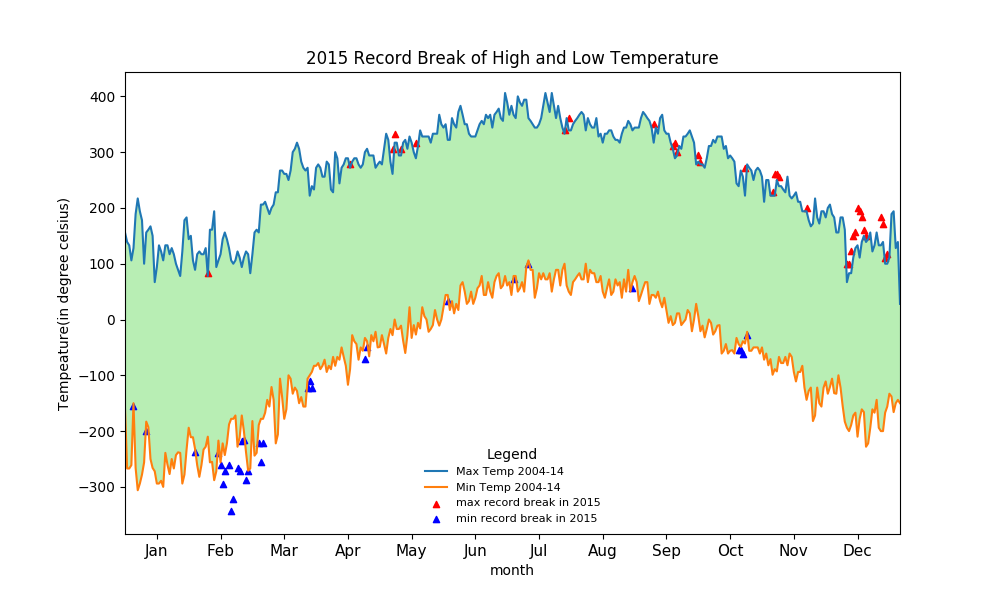

In [9]:
import numpy as np
days = np.arange(0,366)
plt.figure(figsize=(10,6))
databefore2015max.plot(label='Max Temp 2004-14')
databefore2015min.plot(label='Min Temp 2004-14')
plt.gca().fill_between(range(366), databefore2015max, databefore2015min, facecolor='#15C708', alpha=0.3)
plt.xlabel("month")
plt.ylabel("Tempeature(in degree celsius)")
plt.title('2015 Record Break of High and Low Temperature')
plt.legend()
plt.show()

In [10]:
data2015 = Data.loc[Data.Date.dt.year > 2014]
data2015max = data2015.loc[data2015.Element == 'TMAX',['Data_Value', 'Dayofyear']]
data2015min = data2015.loc[data2015.Element == 'TMIN',['Data_Value', 'Dayofyear']]

In [11]:
data2015max = data2015max.groupby('Dayofyear').Data_Value.max()
data2015min = data2015min.groupby('Dayofyear').Data_Value.min()

In [12]:
df = pd.DataFrame({'Dayofyear': days,
                  'temp_max': databefore2015max,
                  'temp_min': databefore2015min,
                  'temp_max2015': data2015max,
                  'temp_min2015': data2015min})

In [13]:
max_recordbreak = data2015max[df.temp_max2015 > df.temp_max]
min_recordbreak = data2015min[df.temp_min2015 < df.temp_min]

In [14]:
max_recordbreak.to_frame()
min_recordbreak.to_frame()

,Data_Value
Dayofyear,
4,-155
10,-200
33,-238
44,-239
45,-260
46,-294
47,-272
49,-260
50,-343


In [15]:
max_recordbreak1 = max_recordbreak.reset_index()
min_recordbreak1 = min_recordbreak.reset_index()

In [16]:
plt.scatter(x=max_recordbreak1.Dayofyear, y=max_recordbreak1.Data_Value, marker='^', c='r',s=20, label='max record break in 2015')
plt.scatter(x=min_recordbreak1.Dayofyear, y=min_recordbreak1.Data_Value, marker='^', c='b', s=20, label='min record break in 2015')
plt.legend(frameon=False, title='Legend', fontsize=8,loc=8)

In [17]:
plt.xticks(np.arange(15,365,30), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=11)

([<matplotlib.axis.XTick at 0x7f40ec2fb7f0>,
 <a list of 12 Text xticklabel objects>)

In [19]:
plt.savefig('assignment2.png')